Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". DO NOT edit cells except the one containing `YOUR CODE HERE` or "YOUR ANSWER HERE".  
Make sure you fill  your name and student number below:

In [79]:
NAME = "Lukas Franz"
STUDENT_NUMBER = "23501307"

---

In [80]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.testing import assert_allclose as nassert

# Numerical Integration:
## 1 Integration Methods Comparision
Write routines to perform numerical integration of a user-defined function $
f(x)$ over an interval $[a,b]$: $I=\int_{a}^{b}f(x)dx$ by means of : the
Midpoint rule with $N$ cells, the Trapezium rule with $N$ cells, Simpson's
rule with $2N$ cells and three point Gauss-Legendre quadrature in each of $N$
cells. Use these routines to evaluate the integrals (a)-(e) below. In each
case complete a table  A of the form:

| $N$ | Midpoint | Trapezium | Simpson | Gauss-Legendre |
| ----- | ----- | ----- |-----  | ----- |
| $2$ | $A_{0,0}$ | $A_{0,1}$ |$A_{0,2}$  | $A_{0,3}$ |
| $4$ | $A_{1,0}$ | $A_{1,1}$ | $A_{1,2}$ | $A_{1,3}$ |
| $16$ | $A_{2,0}$ | $A_{2,1}$ | $A_{2,2}$ | $A_{2,3}$ |
| $32$ | $A_{3,0}$ | $A_{3,1}$ | $A_{3,2}$ | $A_{3,3}$ |


and determine the rate of convergence of the algorithms by calculating the
error for different values of $N$. Compare the performance of the different
algorithms for each of the given integrals by establishing the order of the
error term. Using the error estimate derived in class try to explain the
different error behaviour for each of integrands.





-  (a) $I=\int_{0}^{\pi }x\cos \left( 3x\right) dx=-\frac{2}{9}$ 


In [103]:
A = np.zeros((4,4)) 

# YOUR CODE HERE

def f(x):
    return x * np.cos(3*x)

def midpoint(f, N, a, b):
    dx = (b-a)/N
    I = 0
    for i in range(N):
        I+= dx*f(a+dx*i + dx/2)

    return I

def midpoint_width(f, dx, a, b):
    I = 0
    i = 0
    while a+dx*i <= b:
        I+= dx*f(a+dx*i + dx/2)
        i+=1

    return I

def trapezuim(f, N, a, b):
    dx = (b-a)/N
    I = 0
    for i in range(N):
        I += 0.5*dx*(f(a+i*dx) + f(a + (i+1)*dx))

    return I

def trapezuim_width(f, dx, a, b):
    I = 0
    i = 0
    while a + (i+1)*dx <= b:
        I += 0.5*dx*(f(a+i*dx) + f(a + (i+1)*dx))
        i+=1

    return I

def simpson(f, N, a, b):
    n = 2*N
    h=(b-a)/n
    k=0.0
    x=a + h
    for i in range(1, N + 1):
        k += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(1,N):
        k += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+k)

def GL(f, N , a, b):
    dx = (b-a)/N
    xk = dx / 2 
    I = 0
    for i in range(N):
        I += dx / 2 * (  5/9 * f(a + i*dx + xk - np.sqrt(3/5) *dx/2)
                       + 8/9 * f(a + i*dx + xk ) 
                       + 5/9 * f(a + i*dx + xk + np.sqrt(3/5) *dx/2))
        
    return I

def GL_width(f, dx , a, b):
    xk = dx / 2 
    I = 0
    i = 0
    while a + i*dx + xk <= b:
        I += dx / 2 * (  5/9 * f(a + i*dx + xk - np.sqrt(3/5) *dx/2)
                       + 8/9 * f(a + i*dx + xk ) 
                       + 5/9 * f(a + i*dx + xk + np.sqrt(3/5) *dx/2))
        i+=1
        
    return I


exact = -2/9
print(-2/9)
a = 0
b = np.pi
for N in [2,4,16,32]:
    print(f"--- N = {N} ---")
    mp = midpoint(f, N, a, b)
    trp = trapezuim(f, N, a, b)
    simp = simpson(f, N, a, b)
    gl = GL(f, N, a, b)
    print("midpoint:", mp, " error: ", abs(exact-mp))
    print("trapezium:", trp, " error: ", abs(exact-trp))
    print("simpson:", simp, " error: ", abs(exact-simp))
    print("GL:", gl, " error: ", abs(exact-gl))

for i, N in enumerate([2,4,16,32]):
    A[i][0] = midpoint(f, N, a, b)
    A[i][1] = trapezuim(f, N, a, b)
    A[i][2] = simpson(f, N, a, b)
    A[i][3] = GL(f, N, a, b)


-0.2222222222222222
--- N = 2 ---
midpoint: 1.7447160499097205  error:  1.9669382721319426
trapezium: -2.4674011002723404  error:  2.245178878050118
simpson: 0.34067699984903355  error:  0.5628992220712558
GL: -0.1950752363233642  error:  0.027146985898858
--- N = 4 ---
midpoint: -0.13827979779585342  error:  0.08394242442636879
trapezium: -0.3613425251813097  error:  0.1391203029590875
simpson: -0.2126340402576721  error:  0.009588181964550108
GL: -0.22209713570323153  error:  0.00012508651899068024
--- N = 16 ---
midpoint: -0.21891041334777084  error:  0.003311808874451372
trapezium: -0.22876077554016977  error:  0.00653855331794756
simpson: -0.22219386741190714  error:  2.8354810315073253e-05
GL: -0.2222221988133623  error:  2.3408859906037804e-08
--- N = 32 ---
midpoint: -0.22141291211797792  error:  0.0008093101042442874
trapezium: -0.2238355944439699  error:  0.0016133722217476776
simpson: -0.22222047289331623  error:  1.749328905981118e-06
GL: -0.22222222186098567  error:  3.612

In [82]:
#Testing answer 


Order of the error terms for the different methods and explanation :

YOUR ANSWER HERE

Midpoint Rule has $O(h^2)$ Error

Trapezium rule has $O(h^2)$ Error 

Simpson's rule has $O(h^4)$ Error 

Gauss-Legendre has $O(h^{2n})$ Error

Low N estimates are accurate in increasing order:
1. Trapezium Rule
2. Midpoint Rule
3. Simpson's rule
4. Gauss-Legendre

High N estimates are accurate in increasing order:
1. Trapezium Rule
2. Midpoint Rule
3. Simpson's rule
4. Gauss-Legendre

-  (b) $I=\int_{0}^{\pi }\sin ^{4}2xdx=\frac{3}{8}\pi $

In [83]:
A = np.zeros((4,4)) 
# YOUR CODE HERE
# raise NotImplementedError()

def f(x):
    return np.sin(2*x)**4

print(3/8 *np.pi)
exact = 3/8 *np.pi
# print("midpoint:", abs(exact - midpoint(f, 2, a, b)))
# print("trapezium:", abs(exact - trapezuim(f, 2, a, b)))
# print("simpson:", abs(exact - simpson(f, 2, a, b)))
# print("GL:", abs(exact - GL(f, 2, a, b)))


a = 0
b = np.pi
for N in [2,4,16,32]:
    print(f"--- N = {N} ---")
    mp = midpoint(f, N, a, b)
    trp = trapezuim(f, N, a, b)
    simp = simpson(f, N, a, b)
    gl = GL(f, N, a, b)
    print("midpoint:", mp, " error: ", abs(mp-exact))
    print("trapezium:", trp, " error: ", abs(trp-exact))
    print("simpson:", simp, " error: ", abs(simp-exact))
    print("GL:", gl, " error: ", abs(gl-exact))

for i, N in enumerate([2,4,16,32]):
    A[i, 0] = midpoint(f, N, a, b)
    A[i, 1] = trapezuim(f, N, a, b)
    A[i, 2] = simpson(f, N, a, b)
    A[i, 3] = GL(f, N, a, b)

1.1780972450961724
--- N = 2 ---
midpoint: 3.141592653589793  error:  1.9634954084936207
trapezium: 3.179843845553853e-63  error:  1.1780972450961724
simpson: 2.0943951023931953  error:  0.9162978572970228
GL: 1.4214836726417794  error:  0.24338642754560702
--- N = 4 ---
midpoint: 0.7853981633974485  error:  0.3926990816987239
trapezium: 1.5707963267948966  error:  0.39269908169872414
simpson: 1.0471975511965976  error:  0.1308996938995748
GL: 1.169279501190392  error:  0.008817743905780384
--- N = 16 ---
midpoint: 1.1780972450961722  error:  2.220446049250313e-16
trapezium: 1.1780972450961724  error:  0.0
simpson: 1.1780972450961722  error:  2.220446049250313e-16
GL: 1.178097245096172  error:  4.440892098500626e-16
--- N = 32 ---
midpoint: 1.1780972450961722  error:  2.220446049250313e-16
trapezium: 1.1780972450961724  error:  0.0
simpson: 1.1780972450961713  error:  1.1102230246251565e-15
GL: 1.1780972450961722  error:  2.220446049250313e-16


In [84]:
#Testing answer 


Order of the error terms for the different methods and explanation :

YOUR ANSWER HERE

Midpoint Rule has $O(h^2)$ Error

Trapezium rule has $O(h^2)$ Error 

Simpson's rule has $O(h^4)$ Error 

Gauss-Legendre has $O(h^{2n})$ Error

Low N estimates are accurate in increasing order:
1. Midpoint Rule
2. Trapezium Rule
3. Simpson's rule
4. Gauss-Legendre

High N estimates are accurate in increasing order:
1. Simpson Rule
2. Gaussian-Legendre
2. Midpoint's Rule
3. Trapezium Rule

-  (c) $I=\int_{0}^{1}x^{\frac{3}{2}}dx=\frac{2}{5}$ 

In [85]:
A = np.zeros((4,4)) 
# YOUR CODE HERE
# raise NotImplementedError()

def f(x):
    return x**(3/2)

print(2/5)
exact = 2/5
a = 0
b = 1
for N in [2,4,16,32]:
    print(f"--- N = {N} ---")
    mp = midpoint(f, N, a, b)
    trp = trapezuim(f, N, a, b)
    simp = simpson(f, N, a, b)
    gl = GL(f, N, a, b)
    print("midpoint:", mp, " error: ", abs(mp-exact))
    print("trapezium:", trp, " error: ", abs(trp-exact))
    print("simpson:", simp, " error: ", abs(simp-exact))
    print("GL:", gl, " error: ", abs(gl-exact))

for i, N in enumerate([2,4,16,32]):
    A[i, 0] = midpoint(f, N, a, b)
    A[i, 1] = trapezuim(f, N, a, b)
    A[i, 2] = simpson(f, N, a, b)
    A[i, 3] = GL(f, N, a, b)

0.4
--- N = 2 ---
midpoint: 0.3872595264191645  error:  0.01274047358083552
trapezium: 0.42677669529663687  error:  0.026776695296636843
simpson: 0.4004319160449886  error:  0.0004319160449886006
GL: 0.39996676288406474  error:  3.323711593528067e-05
--- N = 4 ---
midpoint: 0.3966068187420478  error:  0.003393181257952238
trapezium: 0.4070181108579007  error:  0.007018110857900661
simpson: 0.40007724944733214  error:  7.724944733211725e-05
GL: 0.39999412290282765  error:  5.877097172368728e-06
--- N = 16 ---
midpoint: 0.39977194111750863  error:  0.00022805888249138873
trapezium: 0.40046340130204794  error:  0.00046340130204791663
simpson: 0.4000024278456883  error:  2.427845688268704e-06
GL: 0.39999981633560144  error:  1.8366439857864236e-07
--- N = 32 ---
midpoint: 0.39994180851527916  error:  5.8191484720859776e-05
trapezium: 0.4001176712097782  error:  0.00011767120977818069
simpson: 0.4000004294134456  error:  4.2941344557956285e-07
GL: 0.39999996753240785  error:  3.246759217034

In [86]:
#Testing answer 


Order of the error terms for the different methods and explanation :

YOUR ANSWER HERE

Midpoint Rule has $O(h^2)$ Error

Trapezium rule has $O(h^2)$ Error 

Simpson's rule has $O(h^4)$ Error 

Gauss-Legendre has $O(h^{2n})$ Error

Low N estimates are accurate in increasing order:
1. Trapeziun Rule
2. Midpoint Rule
3. Simpson's rule
4. Gauss-Legendre

High N estimates are accurate in increasing order:
1. Trapeziun Rule
2. Midpoint Rule
3. Simpson's rule
4. Gauss-Legendre

-  (d) $I=\int_{0}^{1}x^{\frac{1}{2}}dx=\frac{2}{3}$

In [87]:
A = np.zeros((4,4)) 
# YOUR CODE HERE
# raise NotImplementedError()

def f(x):
    return x**0.5

print(2/3)
exact = 2/3
a = 0
b = 1
for N in [2,4,16,32]:
    print(f"--- N = {N} ---")
    mp = midpoint(f, N, a, b)
    trp = trapezuim(f, N, a, b)
    simp = simpson(f, N, a, b)
    gl = GL(f, N, a, b)
    print("midpoint:", mp, " error: ", abs(mp-exact))
    print("trapezium:", trp, " error: ", abs(trp-exact))
    print("simpson:", simp, " error: ", abs(simp-exact))
    print("GL:", gl, " error: ", abs(gl-exact))

for i, N in enumerate([2,4,16,32]):
    A[i, 0] = midpoint(f, N, a, b)
    A[i, 1] = trapezuim(f, N, a, b)
    A[i, 2] = simpson(f, N, a, b)
    A[i, 3] = GL(f, N, a, b)

0.6666666666666666
--- N = 2 ---
midpoint: 0.6830127018922193  error:  0.01634603522555267
trapezium: 0.6035533905932737  error:  0.0631132760733929
simpson: 0.6565262647925707  error:  0.010140401874095928
GL: 0.667555450538809  error:  0.0008887838721424179
--- N = 4 ---
midpoint: 0.6729773970061621  error:  0.006310730339495474
trapezium: 0.6432830462427466  error:  0.02338362042392006
simpson: 0.6630792800850236  error:  0.0035873865816430373
GL: 0.6669809063686559  error:  0.00031423970198929396
--- N = 16 ---
midpoint: 0.6675366756806553  error:  0.000870009013988704
trapezium: 0.6635811968772282  error:  0.0030854697894384664
simpson: 0.6662181827461795  error:  0.0004484839204871305
GL: 0.6667059466765669  error:  3.928000990027769e-05
--- N = 32 ---
midpoint: 0.6669826864780721  error:  0.00031601981140549906
trapezium: 0.6655589362789417  error:  0.0011077303877249367
simpson: 0.6665081030783622  error:  0.00015856358830446116
GL: 0.6666805542473822  error:  1.388758071552143

In [88]:
#Testing answer 


Order of the error terms for the different methods and explanation :

YOUR ANSWER HERE

Midpoint Rule has $O(h^2)$ Error

Trapezium rule has $O(h^2)$ Error 

Simpson's rule has $O(h^4)$ Error 

Gauss-Legendre has $O(h^{2n})$ Error

Low N estimates are accurate in increasing order:
1. Trapeziun Rule
2. Midpoint Rule
3. Simpson's rule
4. Gauss-Legendre

High N estimates are accurate in increasing order:
1. Trapeziun Rule
2. Midpoint Rule
3. Simpson's rule
4. Gauss-Legendre


-  (e) $I=\int_{0}^{1}\left( -\ln x\right) ^{\frac{3}{2}}dx= \frac{3}{4}\pi ^{1/2}$ (use only the open integration rules i.e. Midpoint and Gauss integration for this integral). Here the matrix A has only 2 columns

In [89]:
A = np.zeros((4,2)) 
# YOUR CODE HERE
# raise NotImplementedError()

def f(x):
    return pow(-np.log(x), 3./2)

print(3/4 * np.pi**0.5)
exact = 3/4 * np.pi**0.5
a = 0
b = 1
for N in [2,4,16,32]:
    print(f"--- N = {N} ---")
    mp = midpoint(f, N, a, b)
    # trp = trapezuim(f, N, a, b)
    # simp = simpson(f, N, a, b)
    gl = GL(f, N, a, b)
    print("midpoint:", mp, " error: ", abs(mp-exact))
    # print("trapezium:", trp, " error: ", abs(trp-exact))
    # print("simpson:", simp, " error: ", abs(simp-exact))
    print("GL:", gl, " error: ", abs(gl-exact))


for i, N in enumerate([2,4,16,32]):
    A[i, 0] = midpoint(f, N, a, b)
    A[i, 1] = GL(f, N, a, b)                

1.329340388179137
--- N = 2 ---
midpoint: 0.893269018723937  error:  0.4360713694552
GL: 1.2405344108479257  error:  0.08880597733121132
--- N = 4 ---
midpoint: 1.0852518060213605  error:  0.2440885821577765
GL: 1.2820646197576333  error:  0.04727576842150372
--- N = 16 ---
midpoint: 1.2571966224311335  error:  0.07214376574800352
GL: 1.3161946198369383  error:  0.013145768342198716
--- N = 32 ---
midpoint: 1.2908042738977374  error:  0.03853611428139958
GL: 1.3224588602807557  error:  0.006881527898381368


In [90]:
#Testing answer 


Order of the error terms for the different methods and explanation :

YOUR ANSWER HERE

Midpoint Rule has $O(h^2)$ Error

Gauss-Legendre has $O(h^{2n})$ Error

Low N estimates are accurate in increasing order:
1. Midpoint Rule
2. Gauss-Legendre

High N estimates are accurate in increasing order:
1. Midpoint Rule
2. Gauss-Legendre


## 2 Boole's Rule: 
In class we showed that if we apply Richardson
extrapolation to the Trapezium Rule then we obtain Simpson's rule. This idea
can be extended to obtain higher order Newton-Cotes integration rules. As an
example combine two estimates of the same integral using Simpson's Rule with 
$h$ and $\frac{h}{2}$ and Richardson Extrapolation (recall that the error in
the Composite Simpson's Rule is $O(h^{4})$) to obtain the so-called Boole's
Rule which is given under the list of closed Newton-Cotes formulae in the
notes:

$\int\limits_{x_{1}}^{x_{5}}f(x)dx=\frac{h}{45}\left(
7f_{1}+32f_{2}+12f_{3}+32f_{4}+7f_{5}\right) +O(h^{7})$



YOUR ANSWER HERE

Using simpson's rule:
\begin{gather*}
    \int\limits_{x_{1}}^{x_{5}}f(x)dx = \frac{h}{3}(f_1 + 4(f_2 + f_4) + 2f_3 + f_5) = S(h) \\
    S\left(\frac{h}{2} \right) = \frac{h}{6}(f_1 + f_5 + 4(f_{1.5} + f_{2.5} + f_{3.5} + f_{4.5}) + 2(f_2 + f_3 + f_4))
\end{gather*}
Then use richardson extrapolation:
\begin{gather*}
    R(h, 2) = \frac{2^4  S\left(\frac{h}{2} \right) - S(h)}{2^4-1}= \frac{h}{45}(8(f_1 + f_5 + 4(f_{1.5} + f_{2.5} + f_{3.5} + f_{4.5}) + 2(f_2 + f_3 + f_4))- (f_1 + 4(f_2 + f_4) + 2f_3 + f_5)) \\
    = \frac{h}{45}(7f_1+ 7f_5 + 32(f_{1.5} + f_{2.5} + f_{3.5} + f_{4.5}) + 12(f_2+f_4) + 14f_3)
\end{gather*}
by mapping $f_n \mapsto f_{2n-1}$
\begin{gather*}
    = \frac{h}{45}(7f_1+ 7f_5 + 32(f_{1.5} + f_{2.5} + f_{3.5} + f_{4.5}) + 12(f_2+f_4) + 14f_3) \\
    = \frac{h}{45}(7f_1+ 7f_9 + 32(f_{2} + f_{4} + f_{6} + f_{8}) + 12(f_3+f_7) + 14f_5) \\
    =  \frac{h}{45}(7f_1+ + 32(f_{2} + f_{4}) + 12f_3 + 7f_5) + \frac{h}{45}(7f_5 + 32(f_{6} + f_{8}) + 12f_7 + 7f_9)
\end{gather*}
This integral can now be seen as 2 integral approximations, one on $[x_1,x_5]$ and one on $[x_5, x_9]$
\begin{gather*}
    \int_{x_0}^{x_5} f(x) dx =  \frac{h}{45}(7f_1+ + 32(f_{2} + f_{4}) + 12f_3 + 7f_5) + O(h^7)
\end{gather*}


## 3 Romberg integration
Repeated Richardson extrapolation applied to the Trapezium Rule is
known as Romberg integration. Use the following asymptotic expansion for the
error in the Trepezium rule,

$$I(0)-I(h_{s})=\sum\limits_{i=1}^{\infty }c_{i}h_{s}^{2i}$$
to derive the recursion for Richardson extrapolants for $I$ in which $h_{s+1}=\frac{1}{2}h_{s}.$

If we define $a_{s}^{(1)}=I(h_{s})$ then by eliminating the $O(h^{2})$ term in the expansion show that:
$$
I(0)-\left\{ a_{s+1}^{(1)}+\frac{a_{s+1}^{(1)}-a_{s}^{(1)}}{2^{2}-1}\right\}
=\sum\limits_{i=2}^{\infty }c_{i}^{(2)}h_{s}^{2i} 
$$
where $c_{i}^{(2)}=\frac{c_{i}}{3}\left( \frac{1}{4^{\left( i-1\right) }}-1\right) .$ Now define
$$
a_{s}^{(2)}=a_{s+1}^{(1)}+\frac{a_{s+1}^{(1)}-a_{s}^{(1)}}{2^{2}-1} 
$$

and use expressions for $a_{s}^{(2)}$ and $a_{s+1}^{(2)}$ to eliminate the $O(h^{4})$ term. Now generalize this to obtain the following recursion for $a_{s}^{(m)}$ in terms of $a_{s}^{(m-1)}$:
$$
a_{s}^{(m)}=a_{s+1}^{(m-1)}+\frac{a_{s+1}^{(m-1)}-a_{s}^{(m-1)}}{4^{m-1}-1} 
$$


YOUR ANSWER HERE

For $m=3$:
\begin{gather*}
I(0) - a^{(2)}_s = \sum\limits_{i=2}^{\infty }c_{i}^{(2)}h_{s}^{2i} = c_{2}^{(2)}h_{s}^{4}+ \sum\limits_{i=3}^{\infty }c_{i}^{(2)}h_{s}^{2i} \\
I(0) - a^{(2)}_{s+1} = \sum\limits_{i=2}^{\infty }c_{i}^{(2)}\left(\frac{h_s}{2}\right)^{2i} = c_{2}^{(2)}\left(\frac{h_s}{2}\right)^{4} + \sum\limits_{i=3}^{\infty }c_{i}^{(2)}\left(\frac{h_s}{2}\right)^{2i} = c_{2}^{(2)}\frac{h_s^4}{16} + \sum\limits_{i=3}^{\infty }c_{i}^{(2)}\frac{h_s^{2i}}{2^{2i}} \\
16I(0) - 16a^{(2)}_{s+1} = c_{2}^{(2)}h_s^4 + 16\sum\limits_{i=3}^{\infty }c_{i}^{(2)}\frac{h_s^{2i}}{2^{2i}}
\end{gather*}
Now subtracting:
\begin{gather*}
(16I(0) - 16a^{(2)}_{s+1}) - (I(0) - a^{(2)}_s) = 15I(0) + a^{(2)}_s - 16a^{(2)}_{s+1} = c_{2}^{(2)}h_s^4 + 16\sum\limits_{i=3}^{\infty }c_{i}^{(2)}\frac{h_s^{2i}}{2^{2i}} - \left(c_{2}^{(2)}h_{s}^{4}+ \sum\limits_{i=3}^{\infty }c_{i}^{(2)}h_{s}^{2i}\right) \\ = \sum\limits_{i=3}^{\infty }16c_{i}^{(2)}\frac{h_s^{2i}}{2^{2i}} - c_{i}^{(2)}h_{s}^{2i} = \sum\limits_{i=3}^{\infty }c_{i}^{(2)}h_{s}^{2i}\left( \frac{16}{4^i} - 1\right) \\
\implies I(0) - \frac{a^{(2)}_s - 16a^{(2)}_{s+1}}{4^2-1} =  \sum\limits_{i=3}^{\infty }c_{i}^{(2)}h_{s}^{2i}\frac{1}{15}\left( \frac{16}{4^i} - 1\right) \\ \implies I(0) - a^{(3)}_s = \sum\limits_{i=3}^{\infty }c_{i}^{(3)}h_{s}^{2i}
\end{gather*}
Where $a^{(3)}_s = \frac{a^{(2)}_s - 16a^{(2)}_{s+1}}{4^2-1}$ and $c_{i}^{(3)} = \frac{1}{15}\left( \frac{16}{4^i} - 1\right)c_{i}^{(2)}$



More generally when $m=m$:
\begin{gather*}
    I(0) - a^{(m)}_s = \sum\limits_{i=m}^{\infty }c_{i}^{(m)}h_{s}^{2i} = c_{m}^{(m)}h_{s}^{2m} + \sum\limits_{i=m+1}^{\infty }c_{i}^{(m)}h_{s}^{2i} \\
    I(0) - a^{(m)}_{s+1} = \sum\limits_{i=m}^{\infty }c_{i}^{(m)}\frac{h_{s}^{2i}}{2^{2i}} = c_{m}^{(m)}\frac{h_{s}^{2m}}{4^{m}} + \sum\limits_{i=m+1}^{\infty }c_{i}^{(m)}\frac{h_{s}^{2i}}{2^{2i}} \\
    4^mI(0) - 4^ma^{(m)}_{s+1} = c_{m}^{(m)}h_{s}^{2m} + \sum\limits_{i=m+1}^{\infty }4^mc_{i}^{(m)}\frac{h_{s}^{2i}}{2^{2i}}
\end{gather*}
Subtracting:
\begin{gather*}
    4^mI(0) - 4^ma^{(m)}_{s+1} - (I(0) - a^{(m)}_s) = (4^m-1)I(0) - ( 4^ma^{(m)}_{s+1} - a^{(m)}_s ) = c_{m}^{(m)}h_{s}^{2m} + \left(\sum\limits_{i=m+1}^{\infty }4^mc_{i}^{(m)}\frac{h_{s}^{2i}}{2^{2i}}\right) - c_{m}^{(m)}h_{s}^{2m} - \sum\limits_{i=m+1}^{\infty }c_{i}^{(m)}h_{s}^{2i} \\
    = \sum\limits_{i=m+1}^{\infty }4^mc_{i}^{(m)}\frac{h_{s}^{2i}}{2^{2i}} - c_{i}^{(m)}h_{s}^{2i} = \sum\limits_{i=m+1}^{\infty } c_{i}^{(m)}h_{s}^{2i}\left(\frac{4^m}{2^{2i}} - 1\right) \\
    \implies I(0) - \frac{ 4^ma^{(m)}_{s+1} - a^{(m)}_s}{4^m-1} = \sum\limits_{i=m+1}^{\infty } \frac{1}{4^m-1}c_{i}^{(m)}h_{s}^{2i}\left(\frac{1}{4^{i-1}} - 1\right) \\
    \implies I(0) - a^{(m+1)}_s = \sum\limits_{i=m+1}^{\infty } c_{i}^{(m+1)}h_{s}^{2i}
\end{gather*}

Where $a_s^{(m+1)} = \frac{ 4^ma^{(m)}_{s+1} - a^{(m)}_s}{4^m-1} = a^{(m)}_{s+1} + \frac{ a^{(m)}_{s+1} - a^{(m)}_s}{4^m-1}$ and $c_{i}^{(m+1)} = \frac{1}{4^m-1}c_{i}^{(m)}\left(\frac{1}{4^{i-1}} - 1\right)$


Modify the routine `trapez` posted on the course web site to perform
repeated Richardson Extrapolation until a prescribed tolerance is reached.
Call this new function 
$$
 [ Integral,I,X]=Romberg(f,a,b,tol,kmax)
$$
where the inputs are f=the integrand, [a,b]= the domain of
integration,  tol = the specified tolerance, and kmax = the
maximum number of refinements. The outputs are:  Integral= the
approximate integral,  I= the array of extrapolated values, and X= the
sample points. Use this routine to evaluate the integral
$$
I=\int_{0}^{1}(1+x^{2})^{-1}dx=\frac{\pi }{4}
$$


Compute the result  for $kmax=20$  and $tol=1e-8$:

In [91]:
res = 0
# YOUR CODE HERE
a=0
b=1
def f(x):
    return (1+x**2)**-1

def trapez(f, a, b, oval, N):
    if N == 1:
        val = 0.5 * (b - a) * (f(a) + f(b))
        h0 = (b - a)
    else:
        i = 2 ** (N - 2)
        h = (b - a) / i
        h0 = h / 2
        x = np.arange(a + 0.5 * h, b, h)
        val = 0.5 * (oval + h * np.sum(f(x)))
    
    return h0, val

def Romberg(f, a, b, tol=1e-8, kmax=20):
    I = np.zeros((kmax, kmax))
    X = []
    h, I[0, 0] = trapez(f, a, b, 0, 1)
    X.append(h)
    
    for k in range(1, kmax):
        h,  I[k, 0] = trapez(f, a, b, I[k-1, 0], k+1)
        X.append(h)
        
        for j in range(1, k+1):
            I[k, j] = I[k, j-1] + (I[k, j-1] - I[k-1, j-1]) / (4**j - 1)
        
        if abs(I[k, k] - I[k-1, k-1]) < tol:
            return I[k, k], I[:k+1, :k+1], X
    
    return I[kmax-1, kmax-1], I, X

integral, I, x = Romberg(f, a, b, 1e-8, 20)

print(integral)
print(np.pi/4)
print(I)
print(x)
print(abs(np.pi/4-integral))
# raise NotImplementedError() TODO ensure this is right

0.7853981634095609
0.7853981633974483
[[0.75       0.         0.         0.         0.         0.        ]
 [0.775      0.78333333 0.         0.         0.         0.        ]
 [0.78279412 0.78539216 0.78552941 0.         0.         0.        ]
 [0.78474712 0.78539813 0.78539852 0.78539645 0.         0.        ]
 [0.7852354  0.78539816 0.78539817 0.78539816 0.78539817 0.        ]
 [0.78535747 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816]]
[1, 0.5, 0.25, 0.125, 0.0625, 0.03125]
1.211264422096292e-11


In [92]:
#Testing answer 


Provide the table of extrapolated values in the table `a` of the following shape (with the value -1 if not defined): 
|$a_{k}^{0}$ | $a_{k}^{1}$ | $a_{k}^{2}$ | $a_{k}^{3}$ |
|------|-----| -----|-----|
| $a_{0,0}$ |*|* |*|
|*|* |* |* |*|
| * |*| *|*|
| * | * |*|*|


In [93]:
a = -1*np.ones((4,4))
a = I[:4, :4]
for i in range(4):
    for j in range(i):
        a[j][i] = -1

print(a)
# raise NotImplementedError()

[[ 0.75       -1.         -1.         -1.        ]
 [ 0.775       0.78333333 -1.         -1.        ]
 [ 0.78279412  0.78539216  0.78552941 -1.        ]
 [ 0.78474712  0.78539813  0.78539852  0.78539645]]


In [94]:
#Testing answer 



How many refinements are required to obtain 5 digits of precision?


YOUR ANSWER HERE

## 4 Singular Integrals

Evaluate the Fresnel integral $I=\int_{0}^{\pi /2}x^{-{\frac{1}{2}}}\cos xdx$ =1.954902848583 directly using your Midpoint code and your
3-point Gauss-Legendre code. The singularity can sometimes be avoided all
together by means of a judicious transformation of variables, which in this
case involves the simple substitution $u=x^{\frac{1}{2}}$. Alternatively,
the convergence of the numerical approximation can be improved by
subtracting out the singularity as follows: $I=\int_{0}^{\pi }x^{-{\frac{1}{2}}}dx+\int_{0}^{\pi }x^{-{\frac{1}{2}}}(\cos x-1)dx=2\sqrt{\pi }+\int_{0}^{\pi }x^{-{\frac{1}{2}}}(\cos x-1)dx$. Since the last integrand is
no longer singular it can be evaluated without difficulty using all the
routines developed above. Compute the transformation when substracting 3 terms.


YOUR ANSWER HERE

\begin{gather*}
    I=\int_{0}^{\pi /2}x^{-{\frac{1}{2}}}\cos xdx = \int_{0}^{\pi /2}x^{-{\frac{1}{2}}}\left(1 -\frac{x^2}{2} + \frac{x^4}{4!}\right)dx + \int_{0}^{\pi /2}x^{-{\frac{1}{2}}}\left(\cos x - 1 +\frac{x^2}{2} - \frac{x^4}{4!}\right)dx \\ 
    \int_{0}^{\pi /2}x^{-{\frac{1}{2}}}\left(1 -\frac{x^2}{2} + \frac{x^4}{4!}\right)dx = \int_{0}^{\pi /2}\frac{x^\frac{7}{2}}{24} - \frac{x^\frac{3}{2}}{2} + x^{-\frac{1}{2}} dx = \left. \frac{x^\frac{9}{2}}{12\times9} - \frac{x^\frac{5}{2}}{5} + 2x^{\frac{1}{2}} \right|_{0}^{\pi /2} \approx 1.9034888059063502
\end{gather*}

In [95]:
def f(x):
    return x**(-0.5) * (np.cos(x) - 1 + (x**2)/2 - (x**4)/24)

def g(x):
    return x**(11/2) /(12*11) - x**(7/2)/7 + 2*x**0.5

print(g(np.pi/2))

print(1.954902848583)
a = 0
b = np.pi / 2
for N in [2,4,16,32]:
    print(f"--- N = {N} ---")
    print("midpoint:", midpoint(f, N, a, b))
    # print("trapezium:", trapezuim(f, N, a, b))
    # print("simpson:", simpson(f, N, a, b))
    print("GL:", GL(f, N, a, b))

1.9034888059063502
1.954902848583
--- N = 2 ---
midpoint: -0.002627703018903862
GL: -0.003890242717956882
--- N = 4 ---
midpoint: -0.0035468277684194255
GL: -0.0038902628292838623
--- N = 16 ---
midpoint: -0.0038682507914848552
GL: -0.0038902632035702693
--- N = 32 ---
midpoint: -0.003884753236501381
GL: -0.003890263203677086




Use the the midpoint rule, the repeated
Trapezoidal rule, and the 3-point Gauss-Legendre rule to evaluate $I$ by (a)
using the transformation, (b) subtracting one and two terms in the Taylor
series expansion for $\cos(x)$. Compare the results by completing the
following table T_si:
|Integration Rule | $h=(\frac{\pi }{2})2^{-4}$ | $h=(\frac{\pi }{2})2^{-6}$ |
|-----| ------| ----- |
|Direct Midpoint | * | * |
|Direct 3 pt Gauss | * | * |
|Transform Midpoint | * | * |
|Transform 3 pt Gauss | * | *|
|Transform Trapezium | * | * |
|Subtract 1 term Midpoint | * | * | 
|Subtract 1 term 3 pt Gauss | * | * | 
|Subtract 1 term Trapezium | * | * | 
|Subtract 2 terms Midpoint | * | * | 
|Subtract 2 terms 3 pt Gauss | * | * |
|Subtract 2 terms Trapezium | * | * | 


In [96]:
T_si = np.zeros((11,2))
# YOUR CODE HERE
a = 0
b = np.pi / 2

hs = np.pi / 2 * np.array([2**-4, 2**-6])

# Direct Midpoint
def f(x):
    return x**-0.5 * np.cos(x)

for i, h in enumerate(hs):
    T_si[0][i] = midpoint_width(f, h, a, b)

# Direct 3 pt Gauss
for i, h in enumerate(hs):
    T_si[1][i] = GL_width(f, h, a, b)


# Transform Midpoint

def f(u):
    return 2*np.cos(u**2)

for i, h in enumerate(hs):
    T_si[2][i] = midpoint_width(f, h, np.sqrt(a), np.sqrt(b))

# Transform 3 pt Gaussian
for i, h in enumerate(hs):
    T_si[3][i] = GL_width(f, h, np.sqrt(a), np.sqrt(b))

# Transform Trapezium
for i, h in enumerate(hs):
    T_si[4][i] = trapezuim_width(f, h, np.sqrt(a), np.sqrt(b))

# Subtract 1 Term Midpoint
def f(x):
    if (x == 0):
        return 0 # accounts for singularity
    return x**-0.5 * (np.cos(x)-1)

residual = 2*(np.pi/2)**(0.5)

for i, h in enumerate(hs):
    T_si[5][i] = residual + midpoint_width(f, h, a, b)

# Subtract 1 Term 3 pt Gaussian
for i, h in enumerate(hs):
    T_si[6][i] = residual + GL_width(f, h, a, b)

# Subtract 1 Term Trapezium
for i, h in enumerate(hs):
    T_si[7][i] = residual + trapezuim_width(f, h, a, b) # TODO determine if residual should be included

# Subtract 2 Term Midpoint
def f(x):
    if (x == 0):
        return 0 # accounts for singularity
    return x**-0.5 * (np.cos(x)-1 + x**2/2)

residual = - (np.pi/2)**(5/2)/5 + 2*(np.pi/2)**(0.5)


for i, h in enumerate(hs):
    T_si[8][i] = residual + midpoint_width(f, h, a, b)

# Subtract 2 Term 3 pt Gaussian
for i, h in enumerate(hs):
    T_si[9][i] = residual + GL_width(f, h, a, b)

# Subtract 2 Term Trapezium
for i, h in enumerate(hs):
    T_si[10][i] = residual + trapezuim_width(f, h, a, b) # TODO


print(T_si)
# raise NotImplementedError()

[[1.7618815  1.85991671]
 [1.87683923 1.91587091]
 [1.95562467 1.95370194]
 [1.953574   1.95489655]
 [1.93731963 1.95464519]
 [1.87417541 1.93516936]
 [1.95490313 1.95490286]
 [1.95450441 1.95487675]
 [1.97502631 1.95958982]
 [1.95490285 1.95490285]
 [1.95522093 1.95492273]]


In [97]:
#Testing answer 



## 5 Integrals on infinite intervals:

Consider evaluating the impropper integrals:
$$
\begin{align}
I_{1} &=\int_{-\infty }^{\infty }e^{-x^{2}}\cos xdx=\pi ^{1/2}e^{-1/4} \\
I_{2} &=\int_{-\infty }^{\infty }e^{-x^{2}}\cos ^{2}xdx=\pi
^{1/2}(1+e^{-1})/2
\end{align}
$$

-  (a) Since the integrands are symmetric convert the integration interval to 
$[ 0,\infty ) $ and use your Romberg routine to estimate $I_{1}$
and $I_{2}$ as follows. Evaluate these integral directly by dividing the
integral into two parts i.e. $[0,\infty )=[0,c]\cup [ c,\infty )$. Can
you control the error in the discarded part? What happens if you keep
increasing $c?$ Plot $I_{k}(c).$



YOUR ANSWER HERE

The error of the discarded part for both $I_1$ and $I_2$ is strictly bounded since:

\begin{gather*}
    -e^{-x^{2}} \le e^{-x^{2}}\cos x, \ e^{-x^{2}}\cos^2 x \le e^{-x^{2}}
\end{gather*}
and $\int_{-\infty}^{\infty} \pm e^{-x^2} dx = \pm \sqrt{\pi}$ and is therefore bounded. Since neither of $I_1$ and $I_2$ go to $\pm\infty$ as $x \to \pm \infty$ any section of their integral from $[c,\infty)$ is also bounded. A simple bound would be to compare $I_1$ and $I_2$ to $\int_c^{\infty} \frac{1}{x^2} dx = \frac{1}{c} > \int_c^{\infty} e^{-x^{2}}\cos xdx, \ \int_c^{\infty} e^{-x^{2}}\cos^2 xdx$ since $\frac{1}{x^2} > e^{-x^{2}}\cos x, \ e^{-x^{2}}\cos^2 x \ \forall \ x>0$. Therefore we can use this bound to show that as we increase $c$ then the error will decrease at least as fast as $\frac{1}{c}$ and as $c \to \infty$ the error goes to $0$.

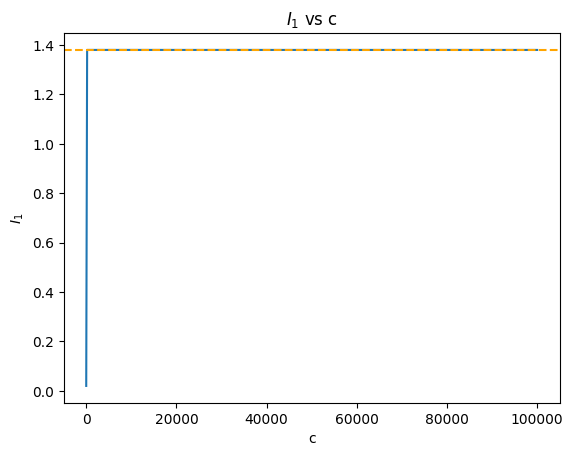

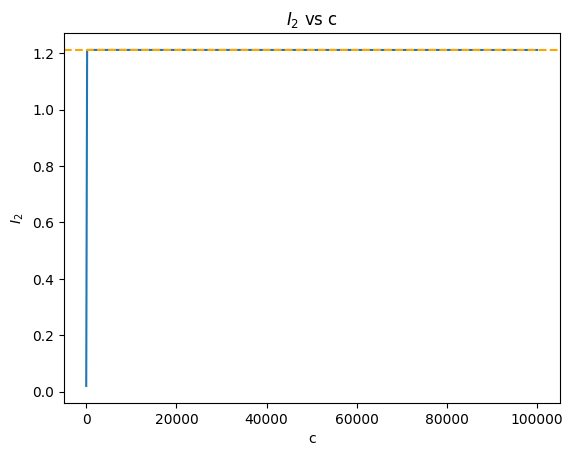

In [98]:
# Your plot
def I_1(x):
    return np.exp(-x**2) * np.cos(x)

def I_2(x):
    return np.exp(-x**2) * np.cos(x)**2

I_1_ans = np.pi**0.5 * np.exp(-1/4)
I_2_ans = np.pi**0.5 * (1 + np.exp(-1)) / 2

a = 0 
cs = np.linspace(0.01, 100000, 500)

i1 = []
for c in cs:
    i1.append(2*Romberg(I_1, a, c)[0]) # *2 for symmetry

plt.plot(cs, i1)
plt.title(r"$I_1$ vs c")
plt.xlabel("c")
plt.ylabel(r"$I_1$")
plt.axhline(I_1_ans, color='orange', linestyle='dashed')
plt.show()

i2 = []
for c in cs:
    i2.append(2*Romberg(I_2, a, c)[0]) # *2 for symmetry

plt.plot(cs, i2)
plt.title(r"$I_2$ vs c")
plt.xlabel("c")
plt.ylabel(r"$I_2$")
plt.axhline(I_2_ans, color='orange', linestyle='dashed')
plt.show()


# YOUR CODE HERE
# raise NotImplementedError()

-  Gauss-Hermite quadrature with integration points evaluates integrals
of the form
$$
\int\limits_{-\infty }^{\infty }e^{-x^{2}}f(x)dx
$$
exactly if $f(x)$ is a polynomial of degree $2m-1.$ Use this fact to
determine the integration points $\xi _{i}$ and weights $w_{i}$ in the
formula
$$
\begin{align}
\int\limits_{-\infty }^{\infty }e^{-x^{2}}f(x)dx &\simeq w_{2,1}f(\xi
_{2,1})+w_{2,2}f(\xi _{2,2})\text{ if }m=2 \\
\int\limits_{-\infty }^{\infty }e^{-x^{2}}f(x)dx &\simeq w_{3,1}f(\xi
_{3,1})+w_{3,2}f(\xi _{3,2})+w_{3,3}f(\xi _{3,3})\text{ if }m=3
\end{align}
$$


To simplify your calculation, you may assume the symmetry
conditions $w_{2,1}=w_{2,2}$ and $\xi _{2,2}=-\xi _{2,1}\geq0$. You
may also assume $w_{3,1}=w_{3,3}$, $\xi _{3,2}=0,$ and $\xi _{3,3}=-\xi _{3,1}\geq0.$

Hint: It may also be helpful to know that $\int\limits_{-\infty }^{\infty}e^{-x^{2}}dx=\pi ^{1/2}$,
$\int\limits_{-\infty }^{\infty }e^{-x^{2}}x^{2}dx=\frac{1}{2}\pi ^{1/2},$ and 
$\int\limits_{-\infty }^{\infty}e^{-x^{2}}x^{4}dx=\frac{3}{4}\sqrt{\pi }.$


For $m=2$:

\begin{gather*}
    f(x) = ax^3 + bx^2 + cx + d \\
    \int\limits_{-\infty }^{\infty }e^{-x^{2}}(ax^3 + bx^2 + cx + d)dx \simeq w_{2,1}f(\xi
    _{2,1})+w_{2,2}f(\xi _{2,2}) \simeq \int\limits_{-\infty }^{\infty }e^{-x^{2}}ax^3 dx  + \int\limits_{-\infty }^{\infty }e^{-x^{2}} bx^2 dx + \int\limits_{-\infty }^{\infty }e^{-x^{2}} cx dx +  \int\limits_{-\infty }^{\infty }e^{-x^{2}}ddx \\
    = 0 + \frac{b}{2}\pi^{1/2} + 0 + d\pi^{1/2} = \frac{b+2d}{2}\sqrt{\pi} = w_{2,1}(f(\xi _{2,1}) + f(-\xi _{2,1})) \\
    =  w_{2,1}(a\xi_{2,1}^3 + b\xi_{2,1}^2 + c\xi_{2,1} + d + a(-\xi_{2,1})^3 + b(-\xi_{2,1})^2 + c(-\xi_{2,1}) + d) = 2w_{2,1}(b\xi_{2,1}^2  + d)
\end{gather*}

by matching terms we see that:
\begin{gather*}
    d\pi^{1/2} = 2w_{2,1}d \implies w_{2,1} = \frac{\sqrt{\pi}}{2} \\
    \frac{b}{2}\pi^{1/2} =  2w_{2,1}b\xi_{2,1}^2 = 2\frac{\sqrt{\pi}}{2}b\xi_{2,1}^2 \implies \xi_{2,1}^2 = \frac{1}{2} \implies \xi_{2,1} = \frac{1}{\sqrt{2}}
\end{gather*}

For $m=3$:

\begin{gather*}
    f(x) = Ax^5 + Bx^4 + Cx^3 + Dx^2 + Ex + F \\
    \int\limits_{-\infty }^{\infty }e^{-x^{2}}(Ax^5 + Bx^4 + Cx^3 + Dx^2 + Ex + F)dx 
    \simeq w_{3,1}f(\xi_{3,1})+w_{3,2}f(\xi _{3,2})+w_{3,3}f(\xi _{3,3}) \\
    \simeq    \int\limits_{-\infty }^{\infty }e^{-x^{2}} Ax^5 
            + \int\limits_{-\infty }^{\infty }e^{-x^{2}} Bx^4 dx
            + \int\limits_{-\infty }^{\infty }e^{-x^{2}} Cx^3 dx
            + \int\limits_{-\infty }^{\infty }e^{-x^{2}} Dx^2 dx
            + \int\limits_{-\infty }^{\infty }e^{-x^{2}} Ex   dx
            + \int\limits_{-\infty }^{\infty }e^{-x^{2}} F    dx \\
    = 0 + \frac{3B}{4}\sqrt{\pi} + 0 + \frac{D}{2}\pi^{1/2} + 0 + F\pi^{1/2} \\
    = \frac{3B}{4}\sqrt{\pi} + \frac{D}{2}\pi^{1/2} + F\pi^{1/2} = w_{3,1}(f(\xi_{3,1}) + f(-\xi_{3,1})) + w_{3,2}f(0) \\
    =  w_{3,1}(A\xi_{3,1} ^5 + B\xi_{3,1}^4 + C\xi_{3,1}^3 + D\xi_{3,1}^2 + E\xi_{3,1} + F + A(-\xi_{3,1})^5 + B(-\xi_{3,1})^4 + C(-\xi_{3,1})^3 + D(-\xi_{3,1})^2 + E(-\xi_{3,1}) + F) + w_{3,2}F \\
    = 2w_{3,1}(B\xi_{3,1}^4 + D\xi_{3,1}^2 + F) + w_{3,2}F
\end{gather*}



by matching terms we see that:
\begin{gather*}
    \frac{3B}{4} \sqrt{\pi} = 2B w_{3,1} \xi_{3,1}^4 \implies \frac{3}{8\xi_{3,1}^4} \sqrt{\pi} = w_{3,1}  \\
    \frac{D}{2} \sqrt{\pi} = 2D w_{3,1} \xi_{3,1}^2 \implies \frac{1}{4\xi_{3,1}^2} \sqrt{\pi} = w_{3,1}  \\
    \implies \frac{3}{8\xi_{3,1}^4} \sqrt{\pi} = \frac{1}{4\xi_{3,1}^2} \sqrt{\pi} \implies \frac{3}{2} = \xi_{3,1}^2 \implies \xi_{3,1} = \sqrt{\frac{3}{2}} \implies \xi_{3,3} = -\sqrt{\frac{3}{2}} \\
    \implies w_{3,1} = \frac{1}{4\left(  \sqrt{\frac{3}{2}}\right)^2} \sqrt{\pi} =  \frac{\sqrt{\pi}}{6}  \\
    (2w_{3,1} + w_{3,2})F = F\sqrt{\pi} \implies w_{3,2} = \frac{2}{3}\sqrt{\pi}
\end{gather*}

In [99]:
w21 = np.sqrt(np.pi) / 2
w22 = w21
xi21 = 1/np.sqrt(2)
xi22 = -xi21
w31 = np.sqrt(np.pi)/6
w32 = np.sqrt(np.pi) *2/3
w33 = w31
xi31 = np.sqrt(3/2)
xi32 = 0
xi33 = -xi31

# YOUR CODE HERE
# raise NotImplementedError()

In [100]:
#Testing answer 



Use these Gauss-Hermite quadrature rules to evaluate $I_{k}$ and complete
the following table I_gh.

|$m$ | $f(x)=\cos x$ | $f(x)=\cos ^{2}x$ |
|-----| ----- | -----|
|$2$ | * | * |
|$3$ | * | * |
|Exact | * | * |

In [101]:
I_gh = np.zeros((3,2))
# YOUR CODE HERE
# raise NotImplementedError()
def f1(x):
    return np.cos(x)

def f2(x):
    return np.cos(x)**2

for col, F in enumerate([f1, f2]):
    I_gh[0][col] = w21*F(xi21) + w22*F(xi22)
    I_gh[1][col] = w31*F(xi31) + w32*F(xi32) + w33*F(xi33)

I_gh[2][0] = I_1_ans
I_gh[2][1] = I_2_ans
    
print(I_gh)

[[1.34749846 1.02442843]
 [1.38203307 1.24960781]
 [1.38038845 1.21225159]]


In [102]:
#Testing answer 
